In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# 创建数据
X = np.linspace(-1, 1, 200)
# 随机化数据
np.random.shuffle(X)
Y = 0.5 * X + 2 + np.random.normal(0, 0.2, (200))

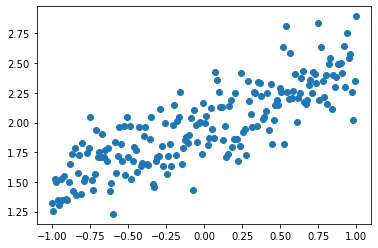

In [3]:
plt.scatter(X, Y)
plt.show()

In [4]:
# 前160条当成训练数据
X_train, Y_train = X[:160], Y[:160]
# 后40条当成测试数据
X_test, Y_test = X[160:], Y[160:]

In [5]:
# 可以理解成顺序执行的容器
model = Sequential()
# Dense 全连接层
# 输入 input_dim
# units 代表该层的输出维度
model.add(Dense(units=1, input_dim=1))

In [6]:
# loss 损失函数 optimizer 优化函数
# mse：mean squared error 均方误差
# sgd：stochastic gradient descent 随机梯度下降
model.compile(loss='mse', optimizer='sgd')

In [7]:
print('训练。。。。。。。。。')
for step in range(301):
    # 训练一批数据
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('训练损失值：', cost)

训练。。。。。。。。。
训练损失值： 5.582777976989746
训练损失值： 0.46785393357276917
训练损失值： 0.13685813546180725
训练损失值： 0.06618791818618774


In [8]:
print('测试。。。。。。。。')
# 用损失函数评估
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('测试损失值：', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

测试。。。。。。。。
1/1 [==============================] - 0s 1ms/step - loss: 0.0583
测试损失值： 0.058341480791568756
Weights= [[0.2200896]] 
biases= [1.9872302]


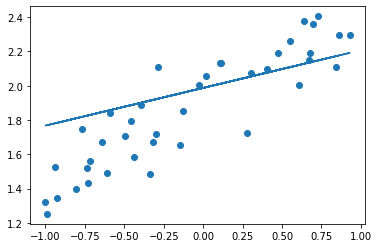

In [9]:
# 预测值
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()